   student_id  weekly_self_study_hours  attendance_percentage  \
0           1                     18.5                   95.6   
1           2                     14.0                   80.0   
2           3                     19.5                   86.3   
3           4                     25.7                   70.2   
4           5                     13.4                   81.9   

   class_participation  total_score grade  
0                  3.8         97.9     A  
1                  2.5         83.9     B  
2                  5.3        100.0     A  
3                  7.0        100.0     A  
4                  6.9         92.0     A  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   atten

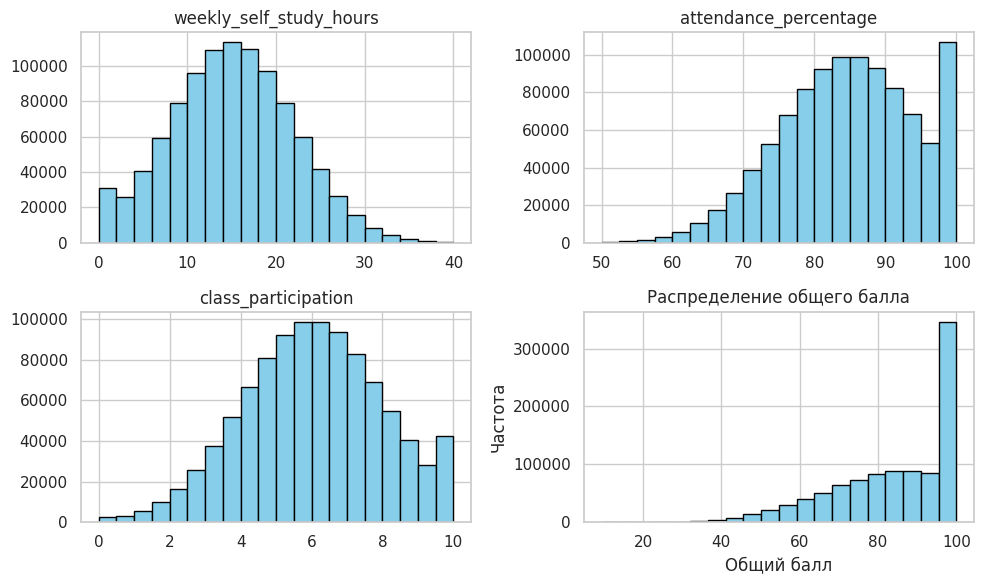

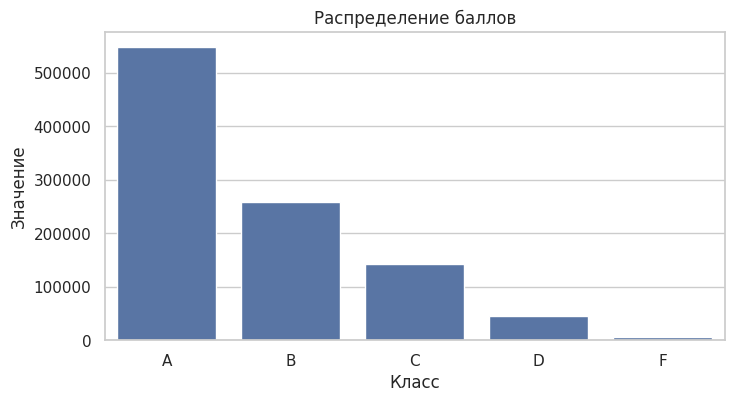

In [ ]:
# ml_module.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#1. Загрузка данных
def load_data(file_path):
  return pd.read_csv('student_performance.csv')

df = pd.read_csv('student_performance.csv')

#2. Информация о данных
print(df.head())
print(df.info())
print(df.describe())

#student_id → Уникальный идентификатор для каждого ученика.
#weekly_self_study_hours → Среднее количество часов самообучения в неделю.
#attendance_percentage → Процент посещаемости.
#class_participation → балл от 0 до 10, указывающий на то, насколько активно учащийся участвует в занятиях.
#total_score → Итоговая оценка успеваемости (0–100).
#grade → Категориальный знак (A, B, C, D, F), производный от total_score.

#3. Обработка данных
#Проверяем наличие пропущенных значений
print('Наличие пропущенных значений:')
print(df.isnull().sum())

#Проверяем наличие дубликатов
print('\nНаличие дубликатов:', df.duplicated().sum())

#Удаляем столбец с id
df= df.drop('student_id', axis=1)

#4. Визуализация данных
#Гистограмма
sns.set(style="whitegrid")
df.hist(bins=20, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.xlabel('Общий балл')
plt.ylabel('Частота')
plt.title('Распределение общего балла')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,4))
sns.countplot(x='grade', data=df)
plt.title('Распределение баллов')
plt.xlabel('Класс')
plt.ylabel('Значение')
plt.show()


def preprocess_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Определение числовых и категориальных признаков
    numeric_features = ['weekly_self_study_hours', 'attendance_percentage', 'class_participation', 'total_score']
    categorical_features = ['grade']

    # Создание препроцессора
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(drop='first')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)])

    # Применение препроцессора к данным
    X_processed = preprocessor.fit_transform(X)
    return X_processed, y, preprocessor

def train_model(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

def predict(model, X):
    return model.predict(X)

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2


Среднеквадратичная ошибка: 80.83
Коэффициент детерминации R^2: 0.66


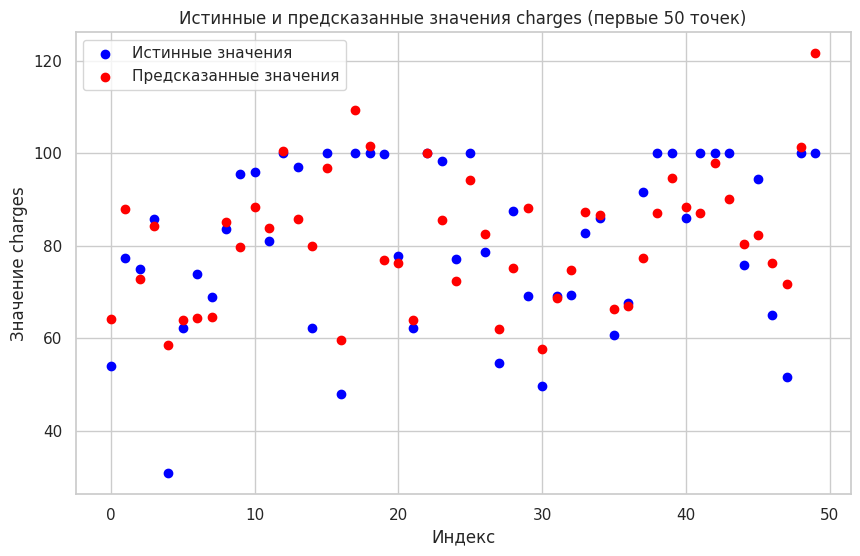

In [ ]:
# main.py
import ml_module as ml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка данных
file_path = 'student_performance.csv'
data = ml.load_data(file_path)

# Предобработка данных
X = df.drop(['total_score', 'grade'], axis=1)
y = df['total_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели
model.fit(X_train_scaled, y_train)

# Предсказание
y_pred = model.predict(X_test_scaled)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse:.2f}")
print(f"Коэффициент детерминации R^2: {r2:.2f}")

# Визуализация истинных и предсказанных значений
def plot_predictions(y_true, y_pred, num_points=50):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(num_points), y_true[:num_points], color='blue', label='Истинные значения')
    plt.scatter(range(num_points), y_pred[:num_points], color='red', label='Предсказанные значения')
    plt.xlabel('Индекс')
    plt.ylabel('Значение charges')
    plt.title(f'Истинные и предсказанные значения charges (первые {num_points} точек)')
    plt.legend()
    plt.show()

plot_predictions(y_test, y_pred)
